In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

### Star formation histories

In [4]:
def bin_sfr(t, sfr, bin_width=0.01):
    bin_left = 0.0
    bin_right = bin_left + bin_width
    
    ave_sfr = []
    ave_t = []
    
    max_val = np.max(t)
    while bin_left < max_val:
        key = np.logical_and(t >=bin_left, t<bin_right)
        ave_sfr.append(np.mean(sfr[key]))
        ave_t.append(np.mean(t[key]))
        
        bin_left += bin_width
        bin_right += bin_width
        
    return np.array(ave_t), np.array(ave_sfr)

(0.0, 3.0)

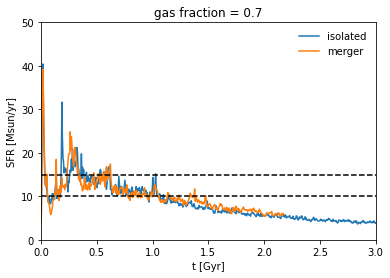

In [5]:
bin_width = 0.005

sfh_file = np.genfromtxt(basepath+'runs/MW3iso_fg0.7_MHG0.25_RC9/lvl4/output/sfr.txt')
time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2], bin_width=bin_width)
plt.plot(time, sfr, label='isolated')

sfh_file_l3 = np.genfromtxt(basepath+'runs/MW3_MHG0.25_GSE2_MHG0.18_Rcut10/lvl4/output/sfr.txt')
time_l3, sfr_l3 = bin_sfr(sfh_file_l3[:,0], sfh_file_l3[:,2], bin_width=bin_width)
plt.plot(time_l3, sfr_l3, label='merger')

# sfh_file_l2 = np.genfromtxt(basepath+'runs/MW3iso_fg0.7/lvl2/output/sfr.txt')
# time_l2, sfr_l2 = bin_sfr(sfh_file_l2[:,0], sfh_file_l2[:,2], bin_width=bin_width)
# plt.plot(time_l2, sfr_l2, label='lvl 2')

plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.title('gas fraction = 0.7')
plt.axhline(10, c='k', ls='dashed')
plt.axhline(15, c='k', ls='dashed')
# plt.axvline(0.005*25)
plt.ylim(0, 50)
plt.xlim(0.0, 3.0)

(0.0, 2.5)

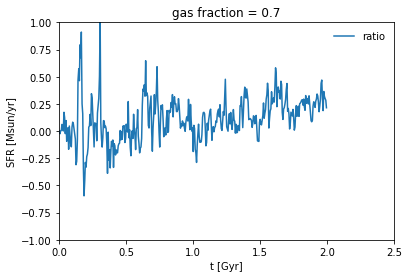

In [17]:
bin_width = 0.005

sfh_file = np.genfromtxt(basepath+'runs/MW3iso_fg0.7_MHG0.25_RC9/lvl4/output/sfr.txt')
time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2], bin_width=bin_width)
# plt.plot(time, sfr, label='isolated')

sfh_file_l3 = np.genfromtxt(basepath+'runs/MW3_MHG0.25_GSE2_MHG0.18/lvl4/output/sfr.txt')
time_l3, sfr_l3 = bin_sfr(sfh_file_l3[:,0], sfh_file_l3[:,2], bin_width=bin_width)
plt.plot(time_l3[:400], (sfr_l3[:400]-sfr[:400])/sfr[:400], label='ratio')

# sfh_file_l2 = np.genfromtxt(basepath+'runs/MW3iso_fg0.7/lvl2/output/sfr.txt')
# time_l2, sfr_l2 = bin_sfr(sfh_file_l2[:,0], sfh_file_l2[:,2], bin_width=bin_width)
# plt.plot(time_l2, sfr_l2, label='lvl 2')

plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.title('gas fraction = 0.7')
plt.axhline(10, c='k', ls='dashed')
plt.axhline(15, c='k', ls='dashed')
# plt.axvline(0.005*25)
plt.ylim(-1, 1)
plt.xlim(0, 2.5)

### Scratch plots

In [68]:
sn = {}
sn_MW_iso = {}
num_list = [0, 50, 100, 150, 200, 250, 300]
for num in num_list:
    sn[num] = arepo.Snapshot(basepath + 'runs/MW3_MHG0.25_GSE2_MHG0.18/lvl4/output', 
                             num, combineFiles=True)
    sn_MW_iso[num] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.7_MHG0.25_RC9/lvl4/output', num,
                                    combineFiles=True)

In [52]:
name = 'MW3_MHG0.25_GSE2_MHG0.18-lvl4'
COM_fpath = basepath + 'anlys/COM/COM_' + name + '.npy'
COM_file = np.load(COM_fpath, allow_pickle=True).item()

# COM_list = COM_file[COM_key]
# nsnap = len(COM_list)

In [66]:
num = 300
rng=[[-80, 80], [-80, 80]]
nres = 256
COM_key = 'Tot_COM'

COM = COM_file[COM_key][num]

dx = (rng[0][1]-rng[0][0]) / nres
dy = (rng[1][1]-rng[1][0]) / nres
surf_area = dx * dy

pos = sn[num].part0.pos.value
mass = sn[num].part0.mass.value * sn[num].part0.GFM_Metallicity
pos = pos - COM

logmetal = np.log10(sn[num].part0.GFM_Metallicity/0.0127)
# key = np.logical_and(logmetal > -1.9, logmetal < -1.5) # GSE CGM
key = np.logical_and(logmetal > -1.5, logmetal < -1.1) # MW CGM

Hxy, _, _ = np.histogram2d(pos[:,0][key], pos[:,1][key], bins=(nres, nres), 
    range=rng, weights=mass[key]/surf_area)

Text(0.5, 1.0, 'MW CGM during merger at t=1.5 Gyr (apocenter)')

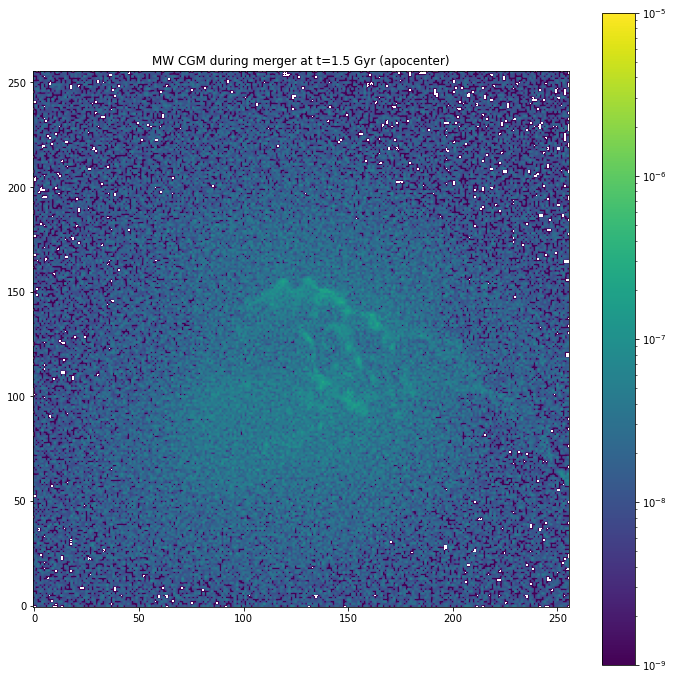

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
im = ax.imshow(Hxy.T, origin='lower', 
                   norm=mpl.colors.LogNorm(vmin=1e-9, vmax=1e-5))
fig.colorbar(im, ax=ax)
ax.set_title('MW CGM during merger at t=1.5 Gyr (apocenter)')

In [56]:

COM = COM_file['MW_COM'][num]

dx = (rng[0][1]-rng[0][0]) / nres
dy = (rng[1][1]-rng[1][0]) / nres
surf_area = dx * dy

pos = sn[num].part0.pos.value
mass = sn[num].part0.mass.value * sn[num].part0.GFM_Metallicity
pos = pos - COM
r = np.linalg.norm(pos, axis=1)

logmetal = np.log10(sn[num].part0.GFM_Metallicity/0.0127)
key = np.logical_and(logmetal > -1.9, logmetal < -1.5) # GSE CGM
# key = np.logical_and(logmetal > -1.5, logmetal < -1.1) # MW CGM

in_MW = r < 8
GSE_CGM_in_MW = np.logical_and(key, in_MW)
mass_CGM_in_MW = np.sum(sn[num].part0.mass.value[GSE_CGM_in_MW])
mass_in_MW = np.sum(sn[num].part0.mass.value[in_MW])
print(mass_CGM_in_MW, mass_in_MW)

Hxy, _, _ = np.histogram2d(pos[:,0][key], pos[:,1][key], bins=(nres, nres), 
    range=rng, weights=mass[key]/surf_area)

4.6848447e-05 0.65463185


In [100]:
num = 300
COM = COM_file['GSE_COM'][num]

pos = sn[num].part0.pos.value
mass = sn[num].part0.mass.value * sn[num].part0.GFM_Metallicity
pos = pos - COM
r = np.linalg.norm(pos, axis=1)

logmetal = np.log10(sn[num].part0.GFM_Metallicity/0.0127)
# key = np.logical_and(logmetal > -1.9, logmetal < -1.5) # GSE CGM
# key = np.logical_and(logmetal > -1.5, logmetal < -1.1) # MW CGM
key = logmetal < -1.1 # total CGM

in_MW = r < 40
GSE_CGM_in_MW = np.logical_and(key, in_MW)
mass_CGM_in_MW = np.sum(sn[num].part0.mass.value[GSE_CGM_in_MW])
mass_in_MW = np.sum(sn[num].part0.mass.value[in_MW])
print(mass_CGM_in_MW, mass_in_MW)

in_MW_not_CGM = np.logical_and(in_MW, np.logical_not(key))

print(np.log10(np.mean(sn[num].part0.GFM_Metallicity[in_MW])))
print(np.log10(np.mean(sn[num].part0.GFM_Metallicity[in_MW_not_CGM])))
print(np.log10(np.mean(sn[num].part0.GFM_Metallicity[GSE_CGM_in_MW])))

# print DM wake
pos = sn[num].part1.pos.value - COM
around_GSE = np.linalg.norm(pos, axis=1) < 40
DM_wake = sn[num].MassTable[1].value * len(np.where(around_GSE)[0])
print('merger DM wake mass:', DM_wake)

# now repeat for iso MW
pos_GSE = COM_file['GSE_COM'][num] - COM_file['MW_COM'][num]
center = np.array([300, 300, 300])
pos = sn_MW_iso[num].part0.pos.value - center
rdiff = np.linalg.norm(pos - pos_GSE, axis=1)

logmetal = np.log10(sn_MW_iso[num].part0.GFM_Metallicity/0.0127)
key = np.logical_and(logmetal > -1.5, logmetal < -1.1)

in_MW = rdiff < 40
GSE_CGM_in_MW = np.logical_and(key, in_MW)
mass_CGM_in_MW = np.sum(sn_MW_iso[num].part0.mass.value[GSE_CGM_in_MW])
mass_in_MW = np.sum(sn_MW_iso[num].part0.mass.value[in_MW])
print(mass_CGM_in_MW, mass_in_MW)

pos = sn_MW_iso[num].part1.pos.value - center - pos_GSE
around_GSE = np.linalg.norm(pos, axis=1) < 40
DM_wake = sn_MW_iso[num].MassTable[1].value * len(np.where(around_GSE)[0])
print('isolated DM wake mass:', DM_wake)

0.048865855 0.3327947
-2.4404817
-2.3766575
-3.1939178
merger DM wake mass: 4.448795227863027
0.0038161294 0.0038161294
isolated DM wake mass: 0.017825365741311536


### SFH

In [63]:
t = np.load(basepath+'anlys/SFH/SFH_MW3_MHG0.25_GSE2_MHG0.18-lvl4.npy', allow_pickle=True).item()

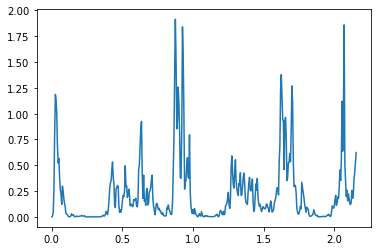

In [65]:
plt.plot(t['Time'], t['SFR_GSE'])

### orbit

Text(0.5, 0, 't [Gyr]')

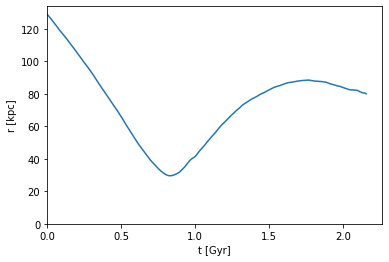

In [85]:
rorbit = np.linalg.norm(COM_file['MW_COM'] - COM_file['GSE_COM'], axis=1)
time = COM_file['Time']
plt.plot(time, rorbit)
plt.xlim(0, None)
plt.ylim(0, None)

plt.ylabel('r [kpc]')
plt.xlabel('t [Gyr]')

In [102]:
print(COM_file['Tot_COM'][300])

[290.10573765 327.59848613 272.70231055]


In [92]:
r = np.linalg.norm(sn[0].part0.pos.value - COM_file['GSE_COM'][0], axis=1)
logmetal = np.log10(sn[0].part0.GFM_Metallicity/0.0127)

in_disk = np.logical_and(logmetal > -1.75, logmetal < -1.65)
in_disk = np.logical_and(r<10, in_disk)
print(np.sum(sn[0].part0.mass.value[in_disk]))

rdisk = np.linalg.norm(sn[0].part2.pos.value - COM_file['GSE_COM'][0], axis=1)
print(sn[0].MassTable[2] * len(np.where(rdisk < 10)[0]))

0.014598323
0.05007779652771596


In [94]:
0.7/0.3 * sn[0].MassTable[2] * len(np.where(rdisk < 10)[0])

0.11684819 1e+10 Msol

### metallicity gradients

In [4]:
sn = {}
sn_MW_iso = {}
num_list = [0, 50, 100, 150, 200, 250, 300]
for num in num_list:
    sn[num] = arepo.Snapshot(basepath + 'runs/MW3_MHG0.25_GSE2_MHG0.18/lvl4/output', 
                             num, combineFiles=True)
    sn_MW_iso[num] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.7_MHG0.25_RC9/lvl4/output', num,
                                    combineFiles=True)

In [13]:
def get_metal_gradient(sn):
    center = np.array([sn.BoxSize, sn.BoxSize, sn.BoxSize])/2.
    metal = sn.part0.GFM_Metallicity
    mass = sn.part0.mass.value
    pos = sn.part0.pos.value - center
    R = np.linalg.norm(pos[:,:2], axis=1)
    z = sn.part0.pos.value[:,2] - center[2]
    
    Rmin = 0.
    dR = 0.5
    
    ave_R = []
    ave_metal = []
    
    while Rmin < 10:
        key = np.logical_and(R > Rmin, R < Rmin+dR)
        key = np.logical_and(key, np.abs(z) < 3)
        ave_metal.append( np.sum(metal[key] * mass[key]) / np.sum(mass[key]) )
        ave_R.append(np.mean(R[key]))
        Rmin += dR
    
    return np.array(ave_R), np.array(ave_metal)

(-2.0, 1.0)

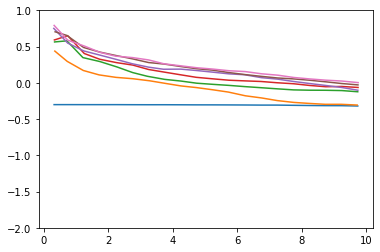

In [20]:
for num in num_list:
    R, metal = get_metal_gradient(sn_MW_iso[num])
    plt.plot(R, np.log10(metal/0.0127))
plt.ylim(-2, 1)